<a href="https://colab.research.google.com/github/samikshasatokar/Cyber-Security-with-Machine-Learning/blob/main/Malicious_URL_Detection_using_Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as s
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_roc_curve
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Self_Study/Cyber Security/malicious_phish.csv")

In [3]:
df.shape

(651191, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [5]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [7]:
count = df.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

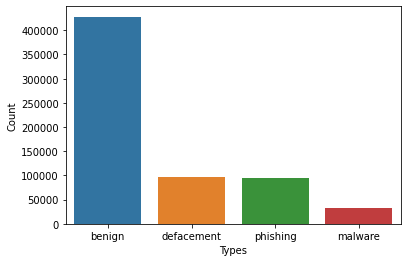

In [8]:
s.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [9]:
#omit the (www.) from the URL which is in fact a sub domain in itself
df['url'] = df['url'].replace('www.', '', regex=True)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [10]:
cat = {"Category": {"benign": 1, "defacement": 2, "phishing":3, "malware":4}}
df['Category'] = df['type']
df = df.replace(cat)

In [11]:
df.tail()

,url,type,Category
651186,xbox360.ign.com/objects/850/850402.html,phishing,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3
651188,gamespot.com/xbox360/action/deadspace/,phishing,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3
651190,angelfire.com/goth/devilmaycrytonite/,phishing,3


# Feature Extraction

In [12]:
df['url_len'] = df['url'].apply(lambda x: len(str(x)))

In [13]:
df.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,3,16
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,2,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,235


In [14]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for f in feature:
    df[f] = df['url'].apply(lambda i: i.count(f))

In [15]:
df.head()

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,3,16,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,2,84,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,235,0,1,1,3,2,0,0,0,0,0,0,0,1


In [16]:
#Counts the number of letter characters in a URL
def count_chars(url):
    chars = 0
    for i in url:
        if i.isalpha():
            chars = chars + 1
    return chars
df['chars'] = df['url'].apply(lambda i: count_chars(i))

In [17]:
#Counts the number of digit characters in a URL
def count_digits(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits']= df['url'].apply(lambda i: count_digits(i))

In [18]:
df.head()

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,chars,digits
0,br-icloud.com.br,phishing,3,16,0,0,1,0,2,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,29,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,1,31,0,0,0,0,2,0,0,0,0,0,0,0,0,25,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,2,84,0,1,1,4,2,0,0,0,0,0,0,0,1,60,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,235,0,1,1,3,2,0,0,0,0,0,0,0,1,199,22


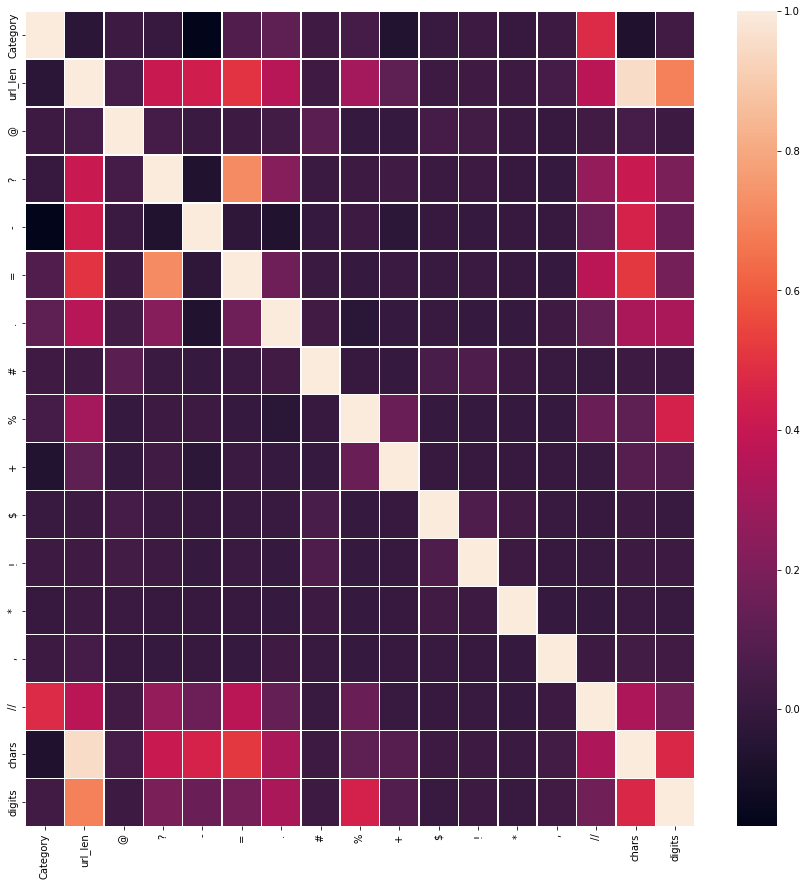

In [19]:
plt.figure(figsize=(15, 15))
s.heatmap(df.corr(), linewidths=.5)

# Train, Test and Split

In [20]:
X = df.drop(['url','type','Category'],axis=1)#,'type_code'
y = df['Category']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [23]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_ab = ab.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [25]:
print("Classification Report of Decision Tree Classifier", classification_report(y_test, y_pred_dt))
print("Classification Report of Random Forest Classifier", classification_report(y_test, y_pred_rf))
print("Classification Report of AdaBoost Classifier", classification_report(y_test, y_pred_ab))
print("Classification Report of GradientBoosting Classifier", classification_report(y_test, y_pred_gb))

Classification Report of Decision Tree Classifier               precision    recall  f1-score   support

           1       0.92      0.97      0.94     85565
           2       0.91      0.95      0.93     19319
           3       0.79      0.55      0.65     18805
           4       0.94      0.90      0.92      6550

    accuracy                           0.90    130239
   macro avg       0.89      0.84      0.86    130239
weighted avg       0.90      0.90      0.90    130239

Classification Report of Random Forest Classifier               precision    recall  f1-score   support

           1       0.92      0.98      0.95     85565
           2       0.92      0.96      0.94     19319
           3       0.81      0.56      0.66     18805
           4       0.95      0.90      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.90      0.85      0.87    130239
weighted avg       0.90      0.91      0.90    130239

Classification Report of AdaBo

In [26]:
dt_cf = confusion_matrix(y_test, y_pred_dt)
rf_cf = confusion_matrix(y_test, y_pred_rf)
ab_cf = confusion_matrix(y_test, y_pred_ab)
gb_cf = confusion_matrix(y_test, y_pred_gb)

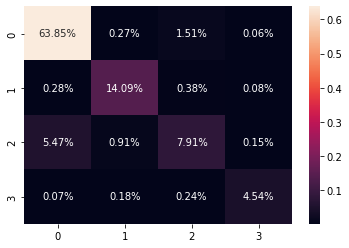

In [27]:
s.heatmap(dt_cf/np.sum(dt_cf), annot=True,fmt= '0.2%')

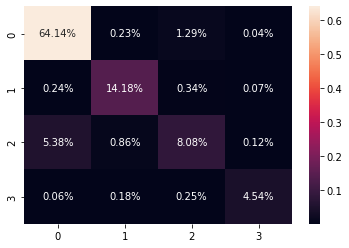

In [28]:
s.heatmap(rf_cf/np.sum(rf_cf), annot=True,fmt= '0.2%')

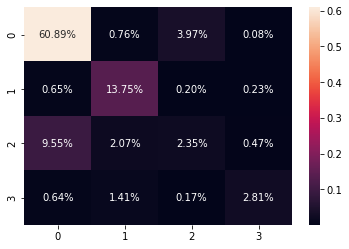

In [29]:
s.heatmap(ab_cf/np.sum(ab_cf), annot=True,fmt= '0.2%')

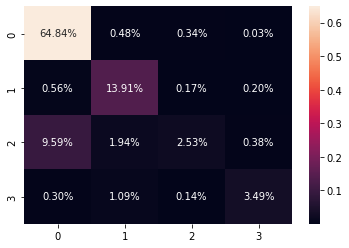

In [30]:
s.heatmap(gb_cf/np.sum(gb_cf), annot=True,fmt= '0.2%')

In [31]:
dt_acc = round(accuracy_score(y_pred_dt, y_test), 2)
rf_acc = round(accuracy_score(y_pred_rf, y_test), 2)
ab_acc = round(accuracy_score(y_pred_ab, y_test), 2)
gb_acc = round(accuracy_score(y_pred_gb, y_test), 2)

In [32]:
acc = [['Decision Tree Classifier', dt_acc], ['Random Forest Classifier',  rf_acc], ['AdaBoost Classifier', ab_acc], ['GradientBoosting Classifier', gb_acc]]
acc_df = pd.DataFrame(acc, columns = ['Classification Algorithm', 'Accuracy Score'])
acc_df

,Classification Algorithm,Accuracy Score
0,Decision Tree Classifier,0.90
1,Random Forest Classifier,0.91
2,AdaBoost Classifier,0.80
3,GradientBoosting Classifier,0.85


In [33]:
px.line(acc_df, x="Classification Algorithm", y="Accuracy Score", title='Comparison of Classification Algorithm', template="plotly_dark")

In [34]:
mse_dt = round(mean_squared_error(y_test.values,y_pred_dt), 2)
mse_rf = round(mean_squared_error(y_test.values,y_pred_rf), 2)
mse_ab = round(mean_squared_error(y_test.values,y_pred_ab), 2)
mse_gb = round(mean_squared_error(y_test.values,y_pred_gb), 2)

In [35]:
mse = [['Decision Tree Classifier', mse_dt], ['Random Forest Classifier',  mse_rf], ['AdaBoost Classifier', mse_ab], ['GradientBoosting Classifier', mse_gb]]
mse_df = pd.DataFrame(mse, columns = ['Classification Algorithm', 'Mean Squared Error'])
mse_df

,Classification Algorithm,Mean Squared Error
0,Decision Tree Classifier,0.32
1,Random Forest Classifier,0.31
2,AdaBoost Classifier,0.71
3,GradientBoosting Classifier,0.52


In [36]:
px.line(mse_df, x="Classification Algorithm", y="Mean Squared Error", title='Comparison of Classification Algorithm', template="plotly_dark")


In [37]:
acc_dict = {'Decision Tree Classifier': dt_acc, 'Random Forest Classifier':  rf_acc, 'AdaBoost Classifier': ab_acc, 'GradientBoosting Classifier': gb_acc}
acc_key_max = max(acc_dict, key=acc_dict.get)  
acc_val_max = max(acc_dict.keys(), key=(lambda x: acc_dict[x]))
print(acc_key_max, " appears to be the best model producing the highest accuracy score value of",(acc_dict[acc_val_max]),".")

Random Forest Classifier  appears to be the best model producing the highest accuracy score value of 0.91 .


In [38]:
mse_dict = {'Decision Tree Classifier': mse_dt, 'Random Forest Classifier':  mse_rf, 'AdaBoost Classifier': mse_ab, 'GradientBoosting Classifier': mse_gb}
mse_key_min = min(mse_dict, key=mse_dict.get)  
mse_val_min = max(mse_dict.keys(), key=(lambda x: mse_dict[x]))
print(mse_key_min, " appears to be the best model producing the lowest mean squared error value of",(mse_dict[mse_val_min]),".")

Random Forest Classifier  appears to be the best model producing the lowest mean squared error value of 0.71 .


# Predictions made by Random Forest Classifier

In [39]:
res = pd.DataFrame([y_pred_rf,y_test])
res = res.T # transpose of matrix
res.columns = ['y_test', 'y_pred_rf']
res.rename(columns = {'y_test':'Actual Values', 'y_pred_rf':'Forecasted Values'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



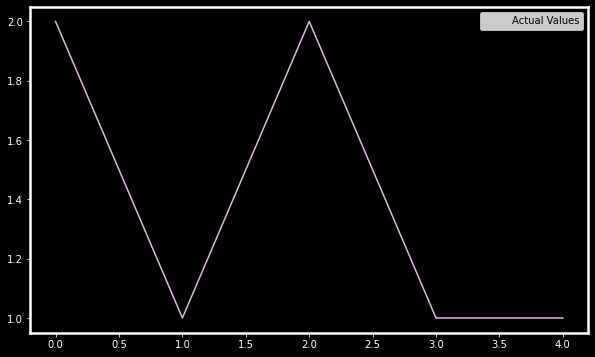

In [40]:
plt.figure(facecolor='black', figsize=(10, 6))
plt.plot(res['Actual Values'].head(), color='#E0BBE4', label='Actual Values')
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for axis in ['top', 'bottom', 'left', 'right']:  # https://www.tutorialspoint.com/how-to-change-the-color-of-a-plot-frame-in-matplotlib
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('white')  # change color
#plt.title('Y_test', color="white")
#plt.xlabel('Time')
#plt.ylabel('Magnitude')
plt.legend()
plt.grid(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



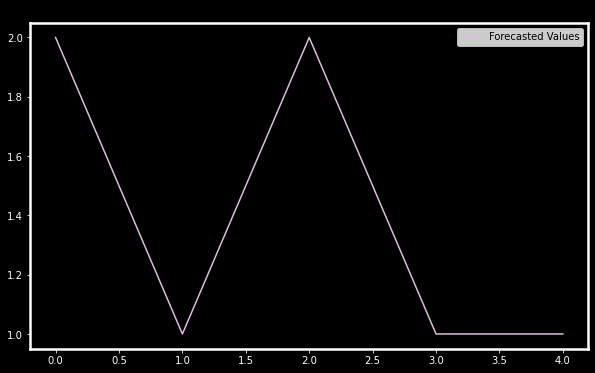

In [41]:
plt.figure(facecolor='black', figsize=(10, 6))
plt.plot(res['Forecasted Values'].head(), color='#E0BBE4', label='Forecasted Values')
ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for axis in ['top', 'bottom', 'left', 'right']:  # https://www.tutorialspoint.com/how-to-change-the-color-of-a-plot-frame-in-matplotlib
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('white')  # change color
plt.title('Prediction')
#plt.xlabel('Time')
#plt.ylabel('Magnitude')
plt.legend()
plt.grid(False)